In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def myPCA(X):

    n = X.shape[0]
    p = X.shape[1]

    # center the data about the mean
    means = np.average(X, 0)
    B = X - means

    # calculate the covariance matrix
    C = 1/(n - 1) * B.T @ B

    # calculate the eigenvalues
    vals, vecs = np.linalg.eig(C)

    # sort the eigenvectors by eigenvalue
    variances = np.abs(vals)
    sorted_indices = np.flip(np.argsort(variances))
    sorted_vals = variances[sorted_indices]
    sorted_vecs = vecs[sorted_indices]

    # return values
    return {'values':sorted_vals, 'components':sorted_vecs, 'C':C}

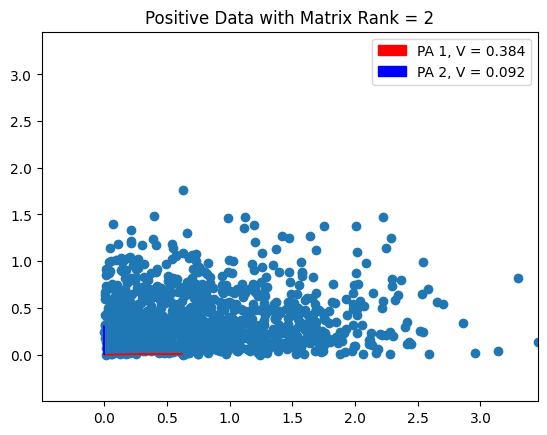

In [ ]:
X = np.random.normal(size=(2,1000))
X[1, :] = 0.5 * X[1, :]

X = np.abs(X)
plt.scatter(*X)

# PCA time
pca_results = myPCA(X.T)

colors = ['red', 'blue']

for idx, col in enumerate(pca_results['components'].T):
    plt.arrow(0, 0, col[0] * np.sqrt(pca_results['values'][idx]), col[1] * np.sqrt(pca_results['values'][idx]), label=f"PA {idx + 1}, V = {pca_results['values'][idx]:.3f}", color=colors[idx])

plt.title(f"Positive Data with Matrix Rank = {np.linalg.matrix_rank(X)}")
plt.xlim(np.min(X) - 0.5, np.max(X))
plt.ylim(np.min(X) - 0.5, np.max(X))
plt.legend()
plt.show()

In [ ]:
pca_results

{'values': array([9.46985978, 0.9226713 ]),
 'components': array([[ 0.11754107, -0.99306802],
        [-0.99306802, -0.11754107]]),
 'C': array([[1.04075844, 0.99768153],
        [0.99768153, 9.35177265]])}